In [392]:
import numpy as np
import matplotlib.pyplot as plt
import random

**Choose problem (only one):**

In [393]:
from GA_CNN import run

**Select parameters:**

Nelder-Mead

In [394]:
ITERATIONS = 20
GENERATIONS = 100

Network

In [395]:
CONV_LAYERS = 1
HIDDEN_LAYERS = 0

Bounds

In [396]:
MIN_POPULATION_SIZE = 2
MAX_POPULATION_SIZE = 100
MAX_HIDDEN_LAYER_WIDTH = 128
MAX_FILTERS = 64
MAX_FILTER_SIZE = 5
MAX_STRIDES = 2
MAX_GAUSSIAN_NOISE = 5.0
MIN_GAUSSIAN_NOISE = 0.01

**Nelder-Mead Algorithm**

In [397]:
def to_param(config) -> list:
    """
    Returns parameters usable by GA algorithm
    :param config: parameter dictionary
    :return: feasible (projected) parameter array, usable by GA algorithm
    """
    params = project(config)
    filter_size, n_filters = params.pop('filter_size'), params.pop('n_filters')
    params['conv_filter_shape'] = [(filter_size[layer], filter_size[layer], n_filters[layer]) for layer in range(CONV_LAYERS)]

    return params

def random_config():
    """
    Random parameters for one GA algorithm
    :return: random parameters
    """
    population_size = random.randint(MIN_POPULATION_SIZE, MAX_POPULATION_SIZE)
    hidden_layer_width = [random.randint(1, MAX_HIDDEN_LAYER_WIDTH) for _ in range(HIDDEN_LAYERS)] if HIDDEN_LAYERS != 0 else [0]
    filter_size = [random.uniform(2, MAX_FILTER_SIZE) for _ in range(CONV_LAYERS)] if CONV_LAYERS != 0 else [0]
    n_filters = [random.uniform(1, MAX_FILTERS) for _ in range(CONV_LAYERS)] if CONV_LAYERS != 0 else [0]
    filter_strides = [random.uniform(1.0, MAX_STRIDES) for _ in range(CONV_LAYERS)] if CONV_LAYERS != 0 else [0]
    pooling_strides = [random.uniform(0, MAX_STRIDES) for _ in range(CONV_LAYERS)] if CONV_LAYERS != 0 else [0]

    return {
        'population_size': population_size,
        'survivor_size': random.randint(2, population_size),
        'generations': GENERATIONS,
        'hidden_layers': HIDDEN_LAYERS,
        'hidden_layer_width': hidden_layer_width,
        'mutation_rate_matrix': random.uniform(0.0, 1.0),
        'mutation_rate_bias': random.uniform(0.0, 1.0),
        'mutation_rate_activation_function': random.uniform(0.0, 1.0),
        'mutation_rate_kernel': random.uniform(0.0, 1.0),
        'crossover_rate': random.uniform(0.0, 1.0),
        'gaussian_noise_stdd': random.uniform(MIN_GAUSSIAN_NOISE, MAX_GAUSSIAN_NOISE),
        'filter_size': filter_size,
        'n_filters': n_filters,
        'filter_strides': filter_strides,
        'pooling_strides': pooling_strides
    }

def project(config):
    """
    Projects parameters to feasible region
    :param config: parameters
    :return: feasible (projected) parameters
    """
    if type(config) != dict:
        config = to_dict(config)

    # round parameters where needed
    config = {'population_size': round(config['population_size']),
              'survivor_size': round(config['survivor_size']),
              'generations': GENERATIONS,
              'hidden_layers': HIDDEN_LAYERS,
              'hidden_layer_width': [round(layer_width) for layer_width in config['hidden_layer_width']],
              'mutation_rate_matrix': config['mutation_rate_matrix'],
              'mutation_rate_bias': config['mutation_rate_bias'],
              'mutation_rate_activation_function': config['mutation_rate_activation_function'],
              'mutation_rate_kernel': config['mutation_rate_kernel'], 'crossover_rate': config['crossover_rate'],
              'gaussian_noise_stdd': config['gaussian_noise_stdd'],
              'filter_size': [round(filter_s) for filter_s in config['filter_size']],
              'n_filters': [round(n_filter) for n_filter in config['n_filters']],
              'filter_strides': [round(stride) for stride in config['filter_strides']],
              'pooling_strides': [round(stride) for stride in config['pooling_strides']]}

    # project parameters to feasible region
    config = {'population_size': max(MIN_POPULATION_SIZE, min(MAX_POPULATION_SIZE, config['population_size'])),
              'survivor_size': max(2, min(config['population_size'], config['survivor_size'])),
              'generations': config['generations'],
              'hidden_layers': config['hidden_layers'],
              'hidden_layer_width': [max(1, min(MAX_HIDDEN_LAYER_WIDTH, layer_width)) for layer_width in config['hidden_layer_width']],
              'mutation_rate_matrix': max(0.0, min(1.0, config['mutation_rate_matrix'])),
              'mutation_rate_bias': max(0.0, min(1.0, config['mutation_rate_bias'])),
              'mutation_rate_activation_function': max(0.0, min(1.0, config['mutation_rate_activation_function'])),
              'mutation_rate_kernel': max(0.0, min(1.0, config['mutation_rate_kernel'])),
              'crossover_rate': max(0.0, min(1.0, config['crossover_rate'])),
              'gaussian_noise_stdd': max(MIN_GAUSSIAN_NOISE, min(MAX_GAUSSIAN_NOISE, config['gaussian_noise_stdd'])),
              'filter_size': [max(2, min(MAX_FILTER_SIZE, filter_s)) for filter_s in config['filter_size']],
              'n_filters': [max(1, min(MAX_FILTERS, n_filter)) for n_filter in config['n_filters']],
              'filter_strides': [max(0, min(MAX_STRIDES, stride)) for stride in config['filter_strides']],
              'pooling_strides': [max(0, min(MAX_STRIDES, stride)) for stride in config['pooling_strides']]}

    return config

def to_array(dictionary):
    if type(dictionary) == list:
        return dictionary

    array = []
    for key, value in dictionary.items():
        if type(value) == list:
            for val in value:
                array.append(val)
        else:
            array.append(value)
    return np.array(array)


def to_dict(array):
    if type(array) == dict:
        return array

    return {
        'population_size': array[0],
        'survivor_size': array[1],
        'generations': array[2],
        'hidden_layers': array[3],
        'hidden_layer_width': [array[4 + i] for i in range(max(1, HIDDEN_LAYERS))],
        'mutation_rate_matrix': array[4 + max(1, HIDDEN_LAYERS)],
        'mutation_rate_bias': array[5 + max(1, HIDDEN_LAYERS)],
        'mutation_rate_activation_function': array[6 + max(1, HIDDEN_LAYERS)],
        'mutation_rate_kernel': array[7 + max(1, HIDDEN_LAYERS)],
        'crossover_rate': array[8 + max(1, HIDDEN_LAYERS)],
        'gaussian_noise_stdd': array[9 + max(1, HIDDEN_LAYERS)],
        'filter_size': [array[10 + max(1, HIDDEN_LAYERS)] for i in range(max(1, CONV_LAYERS))],
        'n_filters': [array[10 + max(1, HIDDEN_LAYERS) + max(1, CONV_LAYERS)] for i in range(max(1, CONV_LAYERS))],
        'filter_strides': [array[10 + max(1, HIDDEN_LAYERS) + 2 * max(1, CONV_LAYERS)] for i in range(max(1, CONV_LAYERS))],
        'pooling_strides': [array[10 + max(1, HIDDEN_LAYERS) + 3 * max(1, CONV_LAYERS)] for i in range(max(1, CONV_LAYERS))]
    }

def nelder_mead(iterations):
    """
    Projected Nelder-Mead algorithm
    :param iterations: iterations of Nelder-Mead algorithm
    """
    # store data
    history_max = []    # max scores in each generation (for plot)
    history_avg = []    # average scores in each generation (for plot)

    configs = []    # parameter config for each vertex (list of dict)
    scores = []     # score for each vertex
    n_params = 14

    print("start")

    # random initial vertices
    for vertex in range(n_params + 1):
        # random parameters
        config = random_config()
        score = run(**to_param(config))

        print("\nrun: ", vertex, " random ", score, to_param(config))
        configs.append(config)
        scores.append(score)

        # for plot
        history_max.append(max(scores))
        history_avg.append(np.mean(scores))

    # algorithm
    for iteration in range(n_params + 2, ITERATIONS + n_params + 2):
        action = None

        # sort (ascending)
        zipped = sorted(zip(scores, configs), key=lambda x: x[0])
        scores, configs = [value[0] for value in zipped], [value[1] for value in zipped]

        # centroid
        worst_config = to_array(configs[0])
        centroid = (np.sum(np.array([to_array(config) for config in configs]), axis=1) - worst_config) / n_params
        diff = centroid - worst_config

        # calculate reflection
        reflected_config = project(centroid + diff)
        #print(reflected_config)
        reflected_score = run(**to_param(reflected_config))

        if scores[1] < reflected_score <= scores[-1]:
            configs[0] = reflected_config
            scores[0] = reflected_score
            action = 'reflection'
        elif reflected_score > scores[-1]:
            expanded_config = project(centroid + 2 * diff)
            #print(expanded_config)
            expanded_score = run(**to_param(expanded_config))
            if expanded_score > reflected_score:
                configs[0] = expanded_config
                scores[0] = expanded_score
                action = 'expansion'
            else:
                configs[0] = reflected_config
                scores[0] = reflected_score
                action = 'reflection'
        else:
            if reflected_score > scores[0]:
                intern_config = project(centroid + 0.7 * (to_array(reflected_config) - centroid))
                #print(intern_config)
                intern_score = run(**to_param(intern_config))
                if intern_score > reflected_score:
                    configs[0] = intern_config
                    scores[0] = intern_score
                    action = 'contraction'
                else:
                    print('shrinking...')
                    for config_idx in range(len(configs) - 1):
                        configs[config_idx] = to_dict(0.9 * (to_array(configs[config_idx]) - to_array(configs[-1])) + to_array(configs[-1]))
                        #print(configs[config_idx])
                        scores[config_idx] = run(**to_param(configs[config_idx]))
                        action = 'shrinking'
            else:
                intern_config = project(centroid + 0.7 * (worst_config - centroid))
                #print(intern_config)
                intern_score = run(**to_param(intern_config))
                if intern_score > scores[0]:
                    configs[0] = intern_config
                    scores[0] = intern_score
                    action = 'contraction'
                else:
                    print('shrinking...')
                    for config_idx in range(len(configs) - 1):
                        configs[config_idx] = to_dict(0.9 * (to_array(configs[config_idx]) - to_array(configs[-1])) + to_array(configs[-1]))
                        #print(configs[config_idx])
                        scores[config_idx] = run(**to_param(configs[config_idx]))
                        action = 'shrinking'

        print('score vertices:', scores)
        print('\nrun: {} {} - max: {} {}'.format(iteration, action, max(scores), to_param(reflected_config)))
        history_max.append(max(scores))
        history_avg.append(np.mean(scores))

    # Plot
    plt.figure()
    plt.plot(np.arange(len(history_max)), history_max, label='max fitness')
    plt.plot(np.arange(len(history_avg)), history_avg, label='avg fitness', alpha=0.6)
    plt.title('Nelder-mead algorithm')
    plt.xlabel('Iterations')
    plt.ylabel('Network accuracy')
    plt.legend()
    plt.show()

    # sort (ascending)
    zipped = sorted(zip(scores, configs), key=lambda x: x[0])
    scores, configs = [value[0] for value in zipped], [value[1] for value in zipped]
    print('\n\nBest performing network:')
    for key, value in project(configs[-1]).items():
        print('{}: {}'.format(key, value))
    print('\n')

**Optimization**

start

run:  0  random  0.4897 {'population_size': 60, 'survivor_size': 2, 'generations': 100, 'hidden_layers': 0, 'hidden_layer_width': [1], 'mutation_rate_matrix': 0.7818448562112049, 'mutation_rate_bias': 0.32913028295744495, 'mutation_rate_activation_function': 0.5120253187535476, 'mutation_rate_kernel': 0.37450356230730386, 'crossover_rate': 0.9781960437734348, 'gaussian_noise_stdd': 3.102829293503173, 'filter_strides': [1], 'pooling_strides': [2], 'conv_filter_shape': [(4, 4, 24)]}

run:  1  random  0.3382 {'population_size': 6, 'survivor_size': 2, 'generations': 100, 'hidden_layers': 0, 'hidden_layer_width': [1], 'mutation_rate_matrix': 0.49585900367921865, 'mutation_rate_bias': 0.9596323098722854, 'mutation_rate_activation_function': 0.40627789879428855, 'mutation_rate_kernel': 0.5188268651484494, 'crossover_rate': 0.13674294183607405, 'gaussian_noise_stdd': 4.798068600604294, 'filter_strides': [1], 'pooling_strides': [2], 'conv_filter_shape': [(4, 4, 31)]}

run:  2  random  0.

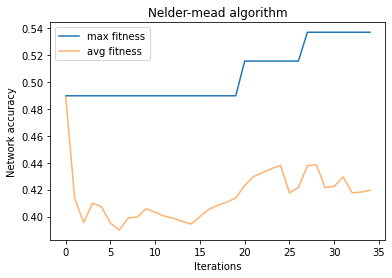



Best performing network:
population_size: 54
survivor_size: 2
generations: 100
hidden_layers: 0
hidden_layer_width: [1]
mutation_rate_matrix: 0.7647562694221941
mutation_rate_bias: 0.38064345253653187
mutation_rate_activation_function: 0.4741352340592164
mutation_rate_kernel: 0.43006492446449984
crossover_rate: 0.9257393916120038
gaussian_noise_stdd: 3.248376718056246
filter_size: [4]
n_filters: [28]
filter_strides: [1]
pooling_strides: [1]


CPU times: total: 3h 41min 16s
Wall time: 3h 40min 23s


In [398]:
%%time
nelder_mead(ITERATIONS)

TODO: allow only one survivor (elite) if crossover_rate == 0